In [119]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

In [135]:
run_idx = 0
run_ep = 16

log_root = Path(f"/home/juhyung/data/longitudinal/log/log_recon_2025_07_13/{run_idx:05d}_train/test/ep_{run_ep}")
print(os.path.exists(log_root))
res_files = sorted(log_root.glob("*.mat"))
print(len(res_files))

True
480


In [136]:
idx = 0
idx = 200

203


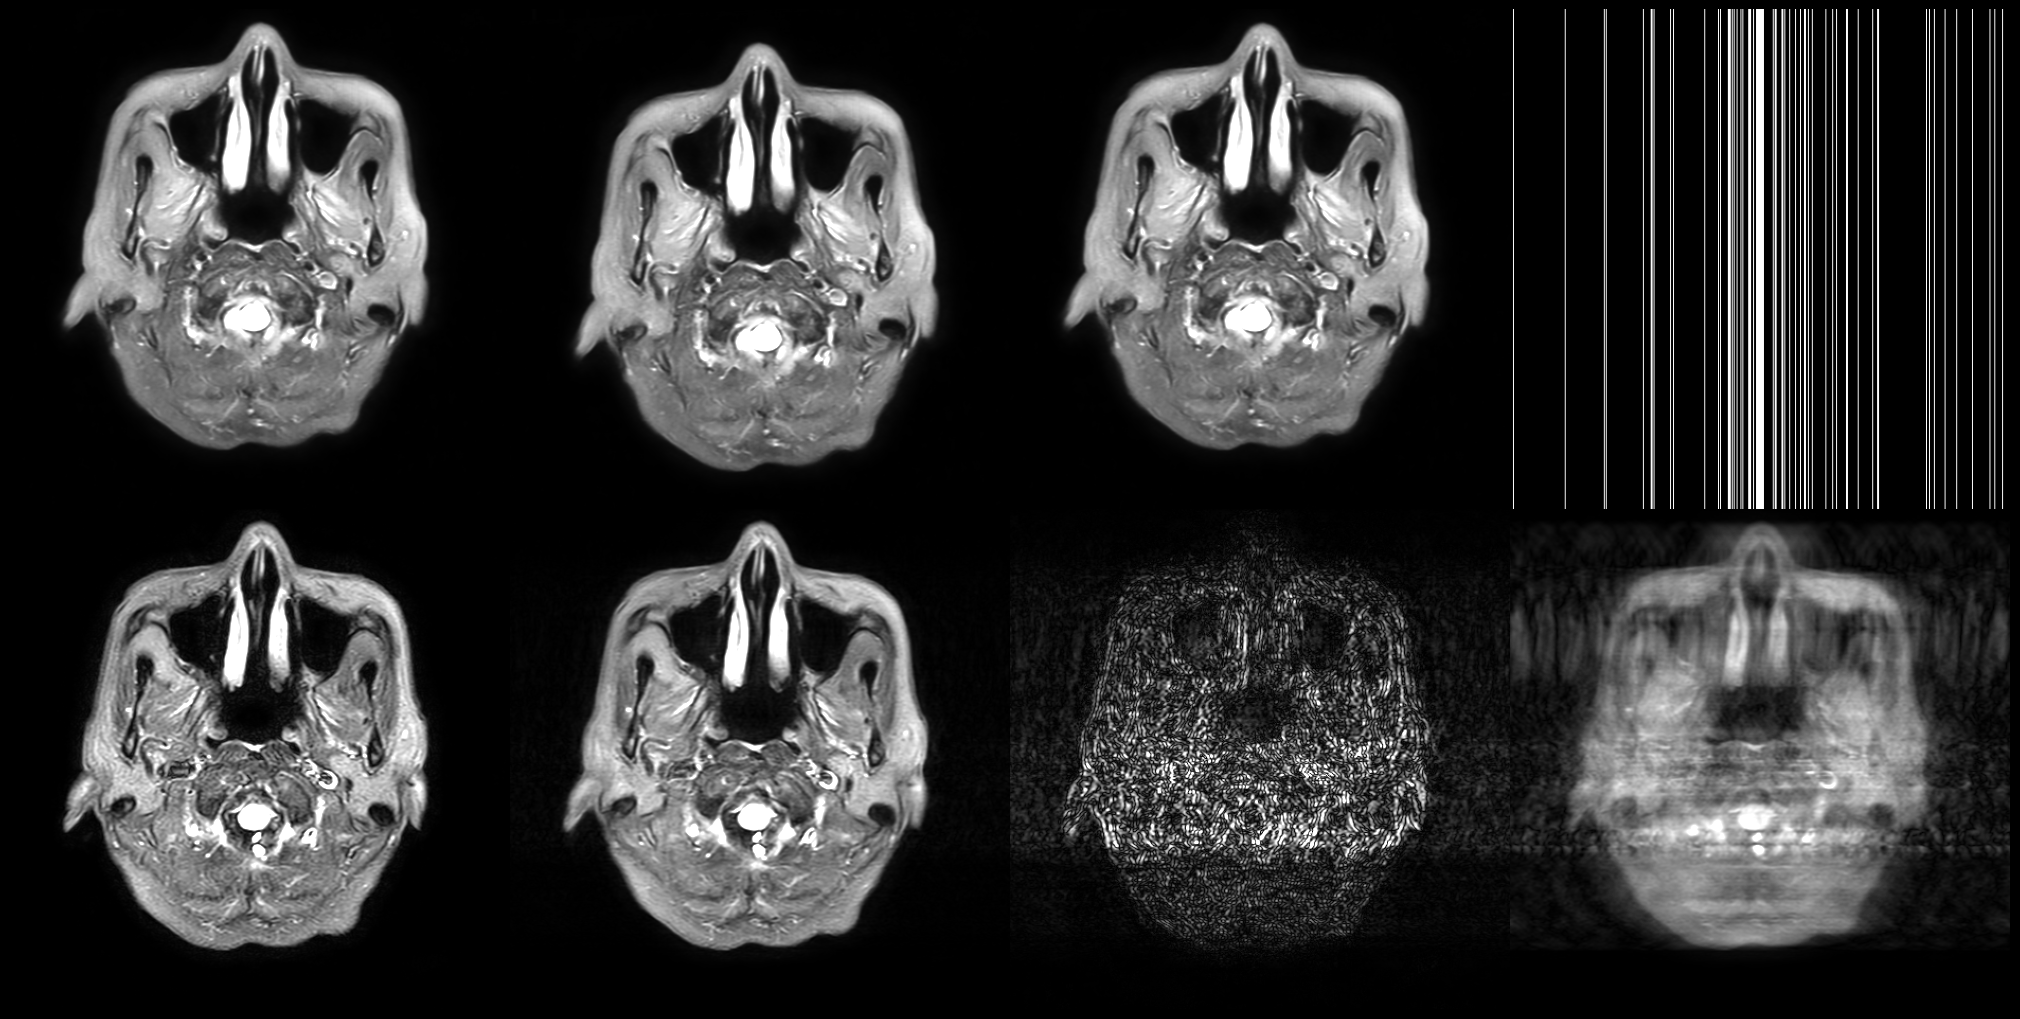

In [139]:
idx += 1
# idx = 8
print(idx)

res_mat = loadmat(res_files[idx])
prior = res_mat["prior"].squeeze()
prior_rot = res_mat["prior_rot"].squeeze()
out = res_mat["out"].squeeze()
label = res_mat["target"].squeeze()
label_undersample = res_mat["label_undersample"].squeeze()
mask = res_mat["mask"].squeeze().astype(np.float32)
prior_reg = res_mat["prior_reg"].squeeze()[1, :, :] if "prior_reg" in res_mat else np.zeros_like(prior)
sudorecon = res_mat["sudorecon"].squeeze() if "sudorecon" in res_mat else np.zeros_like(prior)


out = np.abs(out[0, :, :] + 1j * out[1, :, :])
label = np.abs(label[:, :, 0] + 1j * label[:, :, 1])
label_undersample = np.abs(label_undersample[:, :, 0] + 1j * label_undersample[:, :, 1])
vmax, vmin = np.percentile(label, 97) * 1.2, np.percentile(label, 3) * 0.05

# out = np.angle(out[0, :, :] + 1j * out[1, :, :])
# label = np.angle(label[:, :, 0] + 1j * label[:, :, 1])
# label_undersample = np.angle(label_undersample[:, :, 0] + 1j * label_undersample[:, :, 1])
# vmax, vmin = np.pi, -np.pi

pvmax, pvmin = np.percentile(prior, 97) * 1.2, np.percentile(prior, 3) * 0.05
x1, x2, y1, y2 = 20, -20, 20, -20
fig = plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, top=1, bottom=0)
fig.patch.set_facecolor("black")
plt.subplot(2, 4, 1)
plt.imshow(prior[x1:x2, y1:y2], cmap="gray", vmax=pvmax, vmin=pvmin)
plt.axis("off")
plt.subplot(2, 4, 2)
plt.imshow(prior_rot[x1:x2, y1:y2], cmap="gray", vmax=pvmax, vmin=pvmin)
plt.axis("off")
plt.subplot(2, 4, 3)
plt.imshow(prior_reg[x1:x2, y1:y2], cmap="gray", vmax=pvmax, vmin=pvmin)
plt.axis("off")
plt.subplot(2, 4, 4)
plt.imshow(mask, cmap="gray", vmax=1, vmin=0)
plt.axis("off")
plt.subplot(2, 4, 5)
plt.imshow(label[x1:x2, y1:y2], cmap="gray", vmax=vmax, vmin=vmin)
plt.axis("off")
plt.subplot(2, 4, 6)
plt.imshow(out[x1:x2, y1:y2], cmap="gray", vmax=vmax, vmin=vmin)
plt.axis("off")
plt.subplot(2, 4, 7)
plt.imshow(5 * abs(label[x1:x2, y1:y2] - out[x1:x2, y1:y2]), cmap="gray", vmax=vmax, vmin=0)
plt.axis("off")
plt.subplot(2, 4, 8)
plt.imshow(label_undersample[x1:x2, y1:y2], cmap="gray", vmax=vmax, vmin=vmin)
plt.axis("off")
plt.tight_layout()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
plt.show()

In [706]:
label[x1:x2, y1:y2].std()

np.float32(1.333664)

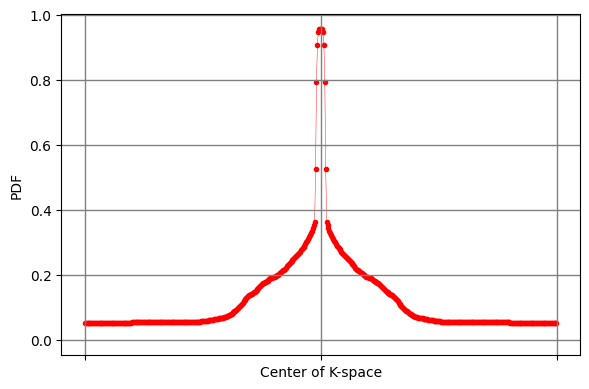

In [464]:
mask_prob = res_mat["mask_prob"].squeeze()
mask_prob = mask_prob[0, :]
img_max = mask_prob.shape[0]

plt.figure(figsize=(6, 4))
plt.plot(mask_prob, ".-", color="red", linewidth=0.3)
plt.axvline(0, linewidth=1, color="gray")
plt.axvline(img_max // 2, linewidth=1, color="gray")
plt.axvline(img_max, linewidth=1, color="gray")
plt.xticks([0, img_max / 2, img_max], ["", "Center of K-space", ""])
for i in range(6):
    plt.axhline(i / 5, linewidth=1, color="gray")
plt.tight_layout()
plt.ylabel("PDF")
plt.tight_layout()
plt.show()

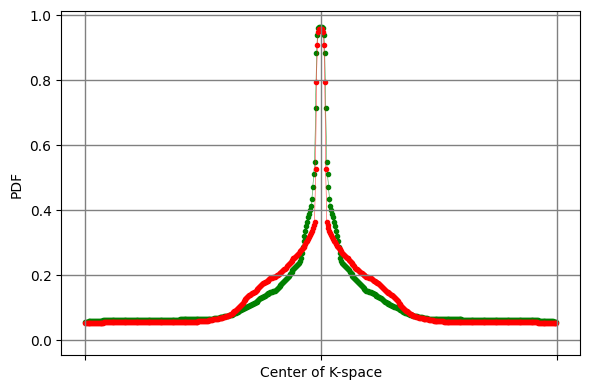

In [6]:
log_v = "log_genmask_2025_07_13"
run_idx = 0
run_ep = 0
log_root = Path(f"/home/juhyung/data/longitudinal/log/{log_v}/{run_idx:05d}_train/test/ep_{run_ep}")
res_files = sorted(log_root.glob("*.mat"))
res_mat = loadmat(res_files[0])
mask_prob = res_mat["mask_prob"].squeeze()
mask_prob = mask_prob[0, :]

run_idx = 0
run_ep = 8
log_root = Path(f"/home/juhyung/data/longitudinal/log/{log_v}/{run_idx:05d}_train/test/ep_{run_ep}")
res_files = sorted(log_root.glob("*.mat"))
res_mat = loadmat(res_files[0])
mask_prob2 = res_mat["mask_prob"].squeeze()
mask_prob2 = mask_prob2[0, :]
img_max = mask_prob.shape[0]

plt.figure(figsize=(6, 4))
plt.plot(mask_prob, ".-", color="green", linewidth=0.3)
plt.plot(mask_prob2, ".-", color="red", linewidth=0.3)
plt.axvline(0, linewidth=1, color="gray")
plt.axvline(img_max // 2, linewidth=1, color="gray")
plt.axvline(img_max, linewidth=1, color="gray")
plt.xticks([0, img_max / 2, img_max], ["", "Center of K-space", ""])
for i in range(6):
    plt.axhline(i / 5, linewidth=1, color="gray")
plt.tight_layout()
plt.ylabel("PDF")
plt.tight_layout()
plt.show()

0.98653865 0.9792005
0.14784808 0.14078805
63.999992 64.0


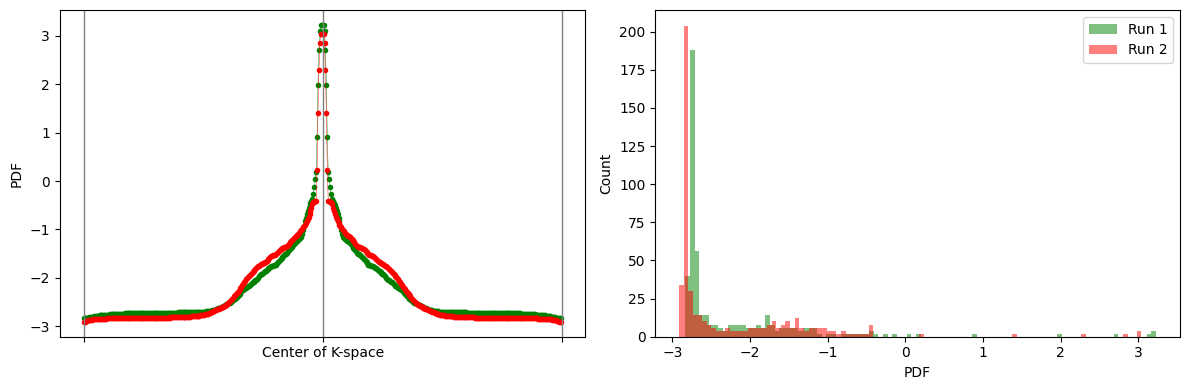

In [392]:
mask_prob_sigmoid_reverse = -np.log(1 / mask_prob - 1)
mask_prob_sigmoid_reverse2 = -np.log(1 / mask_prob2 - 1)
print(mask_prob_sigmoid_reverse.std(), mask_prob_sigmoid_reverse2.std())
print(mask_prob.std(), mask_prob2.std())
print(mask_prob.sum(), mask_prob2.sum())

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(mask_prob_sigmoid_reverse, ".-", color="green", linewidth=0.3)
plt.plot(mask_prob_sigmoid_reverse2, ".-", color="red", linewidth=0.3)
plt.axvline(0, linewidth=1, color="gray")
plt.axvline(img_max // 2, linewidth=1, color="gray")
plt.axvline(img_max, linewidth=1, color="gray")
plt.xticks([0, img_max / 2, img_max], ["", "Center of K-space", ""])
plt.tight_layout()
plt.ylabel("PDF")
plt.subplot(1, 2, 2)
plt.hist(mask_prob_sigmoid_reverse, bins=100, color="green", alpha=0.5, label="Run 1")
plt.hist(mask_prob_sigmoid_reverse2, bins=100, color="red", alpha=0.5, label="Run 2")
plt.xlabel("PDF")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [254]:
import random

In [258]:
random.random()

0.5692683108287081

In [443]:
5 + 3 + 1 + 5 + 5

19

In [445]:
49 + 22 + 22 + 10 + 49 - 120

32